In [3]:
import pandas as pd
df=pd.read_csv("vehicles.csv")
df.columns

C:\Users\ea873\AppData\Local\Temp\ipykernel_4824\2598564184.py:2: DtypeWarning: Columns (70,71,72,73,74,76,79) have mixed types. Specify dtype option on import or set low_memory=False.
  df=pd.read_csv("vehicles.csv")


Index(['barrels08', 'barrelsA08', 'charge120', 'charge240', 'city08',
       'city08U', 'cityA08', 'cityA08U', 'cityCD', 'cityE', 'cityUF', 'co2',
       'co2A', 'co2TailpipeAGpm', 'co2TailpipeGpm', 'comb08', 'comb08U',
       'combA08', 'combA08U', 'combE', 'combinedCD', 'combinedUF', 'cylinders',
       'displ', 'drive', 'engId', 'eng_dscr', 'feScore', 'fuelCost08',
       'fuelCostA08', 'fuelType', 'fuelType1', 'ghgScore', 'ghgScoreA',
       'highway08', 'highway08U', 'highwayA08', 'highwayA08U', 'highwayCD',
       'highwayE', 'highwayUF', 'hlv', 'hpv', 'id', 'lv2', 'lv4', 'make',
       'model', 'mpgData', 'phevBlended', 'pv2', 'pv4', 'range', 'rangeCity',
       'rangeCityA', 'rangeHwy', 'rangeHwyA', 'trany', 'UCity', 'UCityA',
       'UHighway', 'UHighwayA', 'VClass', 'year', 'youSaveSpend', 'guzzler',
       'trans_dscr', 'tCharger', 'sCharger', 'atvType', 'fuelType2', 'rangeA',
       'evMotor', 'mfrCode', 'c240Dscr', 'charge240b', 'c240bDscr',
       'createdOn', 'modifiedOn

In [6]:
dfFil=df.loc[:,["cylinders","drive","displ","fuelType","highway08","make","model","trany","year"]]
dfFil=dfFil.rename(columns={"cyllinders":"cilindros","drive":"eje_motriz","displ":"consumo_litros","fuelType":"tipo_combustible","higway08":"mpg","make":"marca",
             "model":"modelo","trany":"transmision","year":"año"})
print(dfFil.dtypes)
dfFil=dfFil[(dfFil.marca=='Audi')|(dfFil.marca=='BMW')|(dfFil.marca=='Porsche')|(dfFil.marca=='Volvo')|(dfFil.marca=='Mercedes-Benz')]

dfFil.query("tipo_combustible =='Premium' or tipo_combustible =='Electricity'", inplace=True)#TENER CUIDADO CON EL inplace=True
dfFil.query("año>= 2020 and año<=2023",inplace=True)

dfFil.sort_values(by="año")
dfFil2=dfFil.loc[:,["marca","tipo_combustible"]]

cylinders           float64
eje_motriz           object
consumo_litros      float64
tipo_combustible     object
highway08             int64
marca                object
modelo               object
transmision          object
año                   int64
dtype: object


In [111]:
df1=dfFil2.query("tipo_combustible == 'Premium'")
df1=df1["marca"].value_counts().reset_index()
df2=dfFil2.query("tipo_combustible == 'Electricity'")
df2=df2["marca"].value_counts().reset_index()
df1

,marca,count
0,BMW,343
1,Mercedes-Benz,262
2,Porsche,219
3,Audi,155
4,Volvo,55


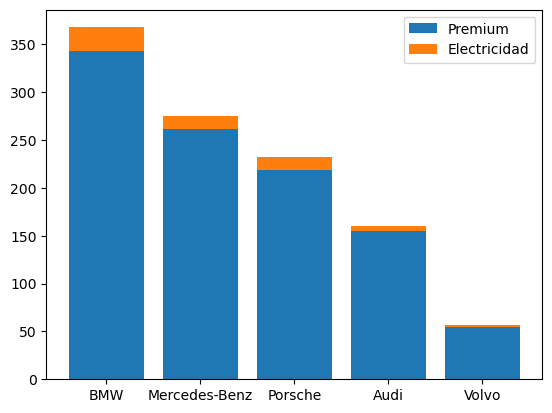

In [114]:
import matplotlib.pyplot as plt
fig, ax=plt.subplots()
ax.bar(df1.marca,df1["count"], label="Premium")
ax.bar(df1.marca,df2["count"], bottom=df1["count"], label="Electricidad")
ax.legend(loc = 'upper right')